<div class="alert alert-block alert-success">
    <h1 align="center">Intro to machine learning</h1>
    <h3 align="center">Project2</h3>
</div>

<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png" width=50%>

## Importing the libraries

In [1]:
%%capture
!pip install pycaret

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.utils
import matplotlib

In [3]:
from pycaret.clustering import *
from sklearn.decomposition import PCA
from pycaret.classification import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [5]:
ch_data = pd.read_csv("Churn.csv")

## EDA

In [7]:
ch_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
ch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
ch_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
ch_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
ch_data['Exited'].value_counts(normalize = True)*100

0    79.63
1    20.37
Name: Exited, dtype: float64

In [12]:
pd.crosstab(ch_data.Gender , ch_data.Exited , normalize = "all")*100

Exited,0,1
Gender,,
Female,34.04,11.39
Male,45.59,8.98


In [13]:
pd.crosstab(ch_data.Age , ch_data.Exited , normalize = "columns")*100

Exited,0,1
Age,,
18,0.251162,0.098184
19,0.326510,0.049092
20,0.477207,0.098184
21,0.627904,0.147275
22,0.904182,0.589102
23,1.167902,0.294551
24,1.481854,0.687285
25,1.858596,0.294551
26,2.335803,0.687285


## Data Preprocessing

In [6]:
# Droping Useless Columns
ch_data = ch_data.drop(["RowNumber" , "CustomerId" , "Surname"] , axis = 1)     # Attention ! Run this command in first runtime !!!
ch_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Strorytelling - Visualization

<AxesSubplot:>

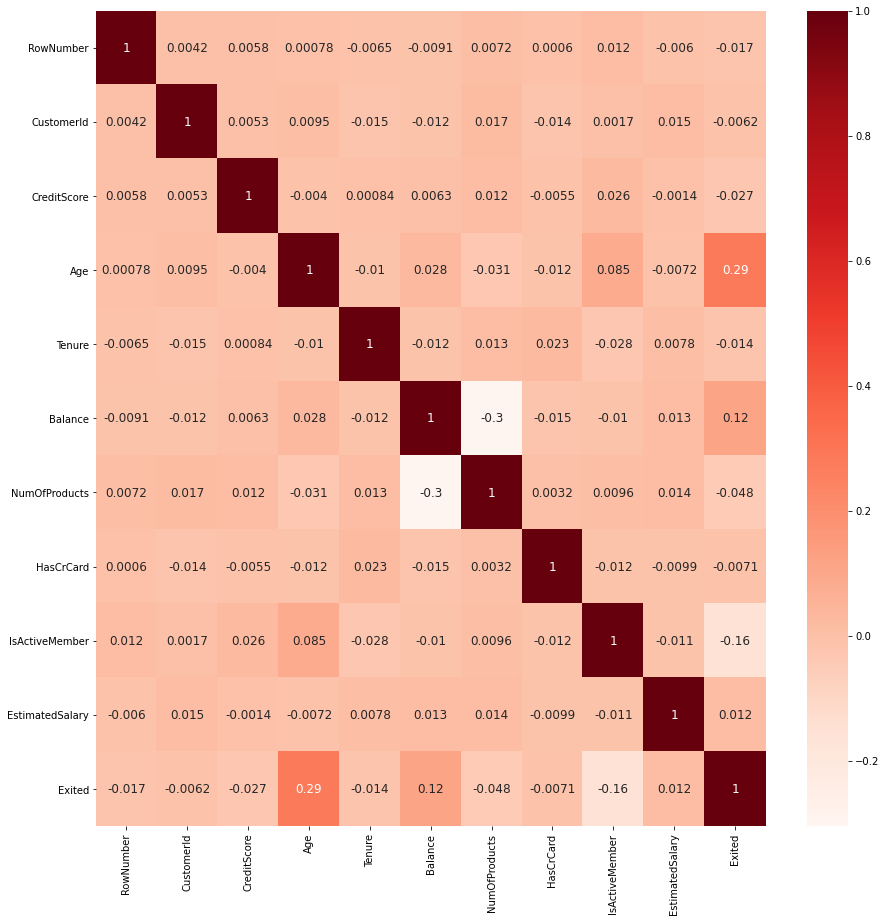

In [14]:
t_corr = ch_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(t_corr, annot=True, annot_kws={'size':12}, cmap='Reds')

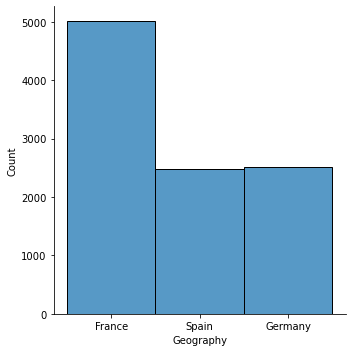

In [46]:
sns.displot(ch_data , x = "Geography")

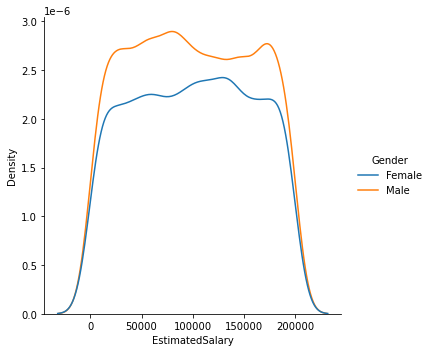

In [50]:
sns.displot(ch_data , x ="EstimatedSalary" , kind ="kde" , hue ="Gender" )

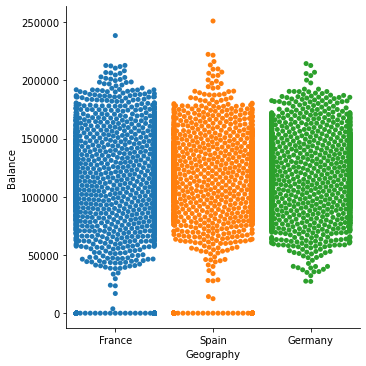

In [51]:
sns.catplot(x="Geography", y="Balance", kind="swarm", data=ch_data)

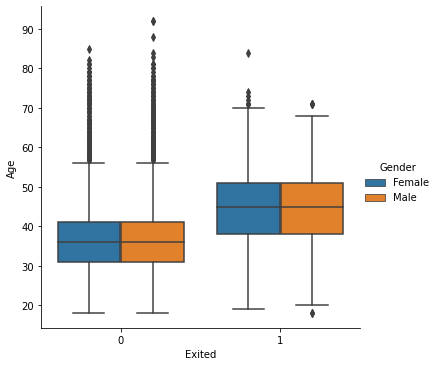

In [59]:
sns.catplot(x="Exited", y="Age", kind="box", hue ="Gender" , data=ch_data)

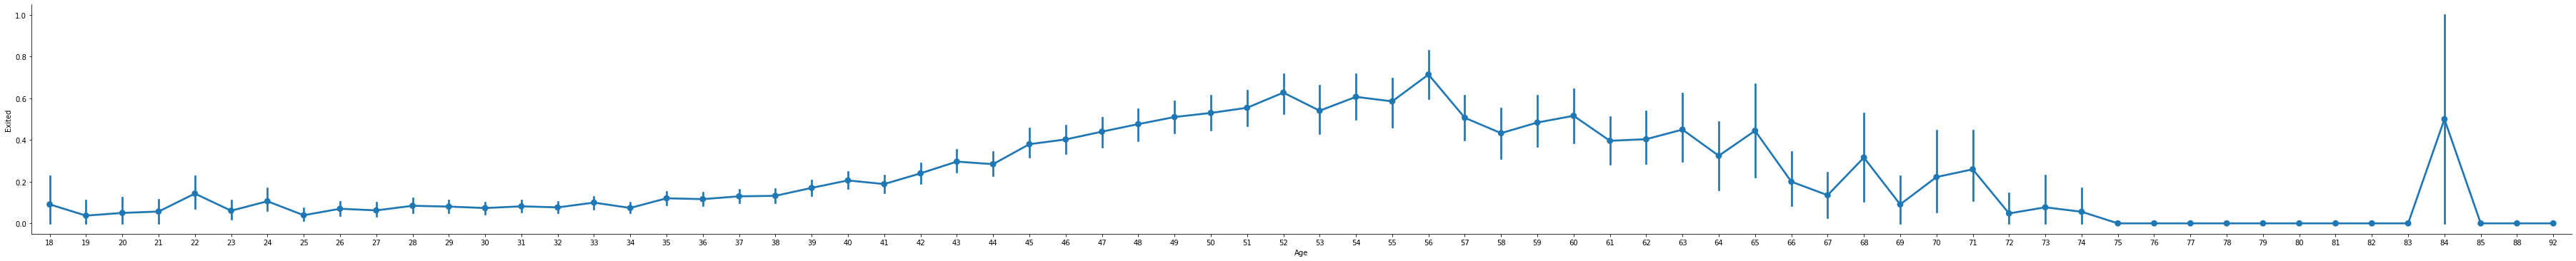

In [67]:
sns.catplot(x="Age", y="Exited", kind="point", data=ch_data , aspect = 10 , height = 5)

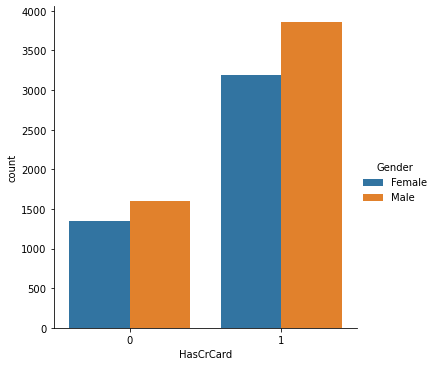

In [75]:
sns.catplot(x="HasCrCard",hue='Gender', kind="count", data=ch_data)

## Prepare Data for Machine learning

In [37]:
# ch_data = pd.get_dummies(ch_data)
# i used LabelEncoder in latest Run

In [38]:
# ch_data 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [90]:
# Scaling data's
#sc = StandardScaler()
#ch_data = sc.fit_transform(ch_data)
#ch_data = pd.DataFrame(data = ch_data , columns = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited','Geography_France','Geography_Germany','Geography_Spain','Gender_Female','Gender_Male'])
ch_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Label Encoding 
ch_data['Geography']=ch_data['Geography'].map({'France':1,'Germany':2,'Spain':3})
ch_data['Gender']=ch_data['Gender'].map({'Male':0,'Female':1})
ch_data.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,1,0,39,5,0.00,2,1,0,96270.64,0
9996,516,1,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,1,36,7,0.00,1,0,1,42085.58,1
9998,772,2,0,42,3,75075.31,2,1,0,92888.52,1
9999,792,1,1,28,4,130142.79,1,1,0,38190.78,0


## Train your model

In [32]:
# 1st SetUp
classification_setup = setup(data= ch_data, target='Exited', silent = True , session_id = 123 , normalize=True ,normalize_method='robust')

,Description,Value
0,session_id,123
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(10000, 14)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [33]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8580,0.8564,0.4392,0.7681,0.5574,0.4806,0.5079,7.2060
rf,Random Forest Classifier,0.8524,0.8399,0.3548,0.8251,0.4952,0.4246,0.4771,3.4640
ada,Ada Boost Classifier,0.8423,0.8311,0.4574,0.6690,0.5421,0.4510,0.4636,1.9280
et,Extra Trees Classifier,0.8404,0.8221,0.2982,0.7900,0.4319,0.3610,0.4195,5.7770
lr,Logistic Regression,0.8325,0.8127,0.3666,0.6678,0.4718,0.3824,0.4074,2.5050
knn,K Neighbors Classifier,0.8250,0.7581,0.3491,0.6314,0.4481,0.3546,0.3773,12.8790
svm,SVM - Linear Kernel,0.8197,0.0000,0.3408,0.6191,0.4310,0.3360,0.3609,0.7520
ridge,Ridge Classifier,0.8134,0.0000,0.2835,0.5911,0.3823,0.2885,0.3158,0.4250
dt,Decision Tree Classifier,0.8127,0.6875,0.4755,0.5491,0.5090,0.3942,0.3961,0.4790
lda,Linear Discriminant Analysis,0.7125,0.6732,0.3107,0.4380,0.3625,0.2533,0.2592,11.8160


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [8]:
#2nd SetUp
classification_setup = setup(data= ch_data, target='Exited', silent = True , session_id = 123 , normalize=True ,normalize_method='minmax')

,Description,Value
0,session_id,123
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(10000, 11)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8608,0.8620,0.4518,0.7756,0.5694,0.4935,0.5199,0.3190
lightgbm,Light Gradient Boosting Machine,0.8588,0.8550,0.4797,0.7404,0.5806,0.5007,0.5185,0.2120
rf,Random Forest Classifier,0.8563,0.8496,0.4497,0.7486,0.5604,0.4811,0.5041,0.2500
xgboost,Extreme Gradient Boosting,0.8517,0.8411,0.4860,0.6981,0.5719,0.4859,0.4982,0.4480
ada,Ada Boost Classifier,0.8470,0.8388,0.4518,0.6958,0.5461,0.4593,0.4757,0.1000
et,Extra Trees Classifier,0.8424,0.8269,0.4259,0.6829,0.5235,0.4356,0.4534,0.2230
lda,Linear Discriminant Analysis,0.8340,0.8243,0.3373,0.6963,0.4532,0.3692,0.4035,0.0140
lr,Logistic Regression,0.8337,0.8237,0.3436,0.6877,0.4564,0.3715,0.4033,0.3270
ridge,Ridge Classifier,0.8293,0.0000,0.2451,0.7591,0.3699,0.2998,0.3648,0.0070
svm,SVM - Linear Kernel,0.8251,0.0000,0.2486,0.7573,0.3562,0.2866,0.3533,0.0170


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [92]:
# scaler = MinMaxScaler()
# ch_data = scaler.fit_transform(ch_data)

In [93]:
# ch_data = pd.DataFrame(data = ch_data , columns = ['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited'])

In [10]:
ch_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,608,3,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,850,3,1,43,2,125510.82,1,1,1,79084.10,0


In [95]:
# Im tryng to find the optimal 'n-components' value
pca = PCA(n_components = 0.95)
pca.fit(ch_data)
reduced = pca.transform(ch_data)

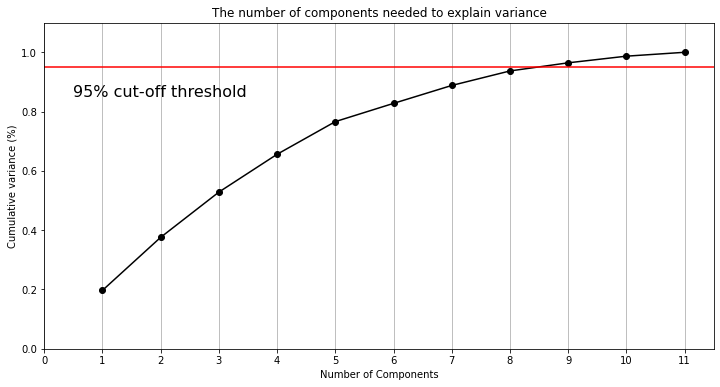

In [96]:
pca = PCA().fit(ch_data)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 12, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='-', color='black')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 12, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'black', fontsize=16)

ax.grid(axis='x')
plt.show()

In [97]:
#3rd SetUp
classification_setup = setup(data= ch_data, target='Exited', silent = True , session_id = 123 , pca=True , pca_method='linear', pca_components=8)

,Description,Value
0,session_id,123
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(10000, 11)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [98]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8194,0.7783,0.2759,0.6382,0.3834,0.2970,0.3337,0.0920
rf,Random Forest Classifier,0.8161,0.7807,0.2360,0.6380,0.3437,0.2624,0.3068,0.3970
xgboost,Extreme Gradient Boosting,0.8130,0.7697,0.3038,0.5842,0.3989,0.3011,0.3241,0.5400
et,Extra Trees Classifier,0.8110,0.7657,0.2213,0.6057,0.3225,0.2398,0.2816,0.2140
gbc,Gradient Boosting Classifier,0.8061,0.7645,0.1132,0.6571,0.1924,0.1406,0.2132,0.5460
ada,Ada Boost Classifier,0.8021,0.7516,0.1132,0.5844,0.1881,0.1313,0.1899,0.1440
nb,Naive Bayes,0.7958,0.6691,0.0035,0.5000,0.0069,0.0050,0.0335,0.0060
lr,Logistic Regression,0.7954,0.6553,0.0007,0.1000,0.0014,0.0008,0.0055,0.0090
svm,SVM - Linear Kernel,0.7954,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0110
ridge,Ridge Classifier,0.7954,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0060


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Test the model and show the metrics

In [ ]:
# The Results show that , the best model is 2nd model

## Save your final model

In [11]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8457,0.8566,0.4336,0.6966,0.5345,0.4480,0.4661
1,0.8686,0.8554,0.4965,0.7802,0.6068,0.5326,0.5522
2,0.8443,0.8312,0.3776,0.7297,0.4977,0.4164,0.4481
3,0.8414,0.8267,0.3427,0.7424,0.4689,0.3902,0.4306
4,0.8771,0.8759,0.4755,0.8608,0.6126,0.5467,0.5807
5,0.8757,0.8897,0.4965,0.8256,0.6201,0.5512,0.5767
6,0.8586,0.8693,0.5035,0.7200,0.5926,0.5102,0.5222
7,0.8471,0.8528,0.4375,0.7079,0.5408,0.4551,0.4741
8,0.8743,0.8821,0.4653,0.8590,0.6036,0.5366,0.5723
9,0.8755,0.8805,0.4895,0.8333,0.6167,0.5484,0.5760


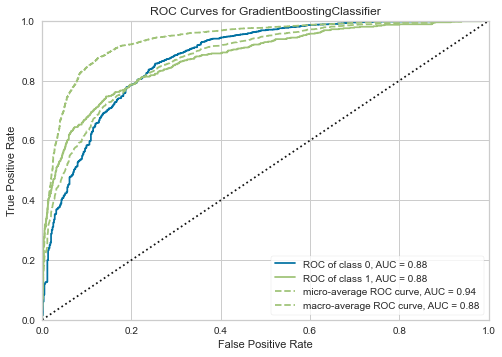

In [12]:
plot_model(gbc)

In [13]:
evaluate_model(gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [14]:
save_model(gbc , 'my gbc model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Exited',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=3, max_features=None,
                                             max_leaf_nodes=None,
                                             min_i

In [ ]:
# M.Hossein Hashemi